In [1]:
import numpy as np
from numpy import *
import scipy as sc
import scipy.optimize as opt
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy.random import randint
import math
from scipy.optimize import minimize as mini
from scipy.optimize import least_squares as ls
from scipy.optimize import leastsq
import gc
from multiprocessing import Process
#import colorednoise as cn
from numpy.fft import ifft, fftfreq
from numpy import concatenate, real, std, abs, min
from numpy.fft import ifft, fftfreq
from numpy.random import normal

In [61]:
data_K = np.loadtxt('NOVEMBER/NOV-F51-K') #'NOVEMBER/Kelly-F51K')
error_K = np.loadtxt('NOVEMBER/F51_NOISE_K.txt') #Load data

data_H = np.loadtxt('NOVEMBER/NOV-F51-H') #'NOVEMBER/Kelly-F51K')
error_H = np.loadtxt('NOVEMBER/F51_NOISE_H.txt') #Load data

data_J = np.loadtxt('NOVEMBER/NOV-F51-J') #'NOVEMBER/Kelly-F51K')
error_J = np.loadtxt('NOVEMBER/F51_NOISE_J.txt') #Load data

data_g = np.loadtxt('NOVEMBER/NOV-F51-g') #'NOVEMBER/Kelly-F51K')
error_g = np.loadtxt('NOVEMBER/F51_NOISE_g.txt') #Load data

data_r = np.loadtxt('NOVEMBER/NOV-F51-r') #'NOVEMBER/Kelly-F51K')
error_r = np.loadtxt('NOVEMBER/F51_NOISE_r.txt') #Load data

data_i = np.loadtxt('NOVEMBER/NOV-F51-i') #'NOVEMBER/Kelly-F51K')
error_i = np.loadtxt('NOVEMBER/F51_NOISE_i.txt') #Load data

data_z = np.loadtxt('NOVEMBER/NOV-F51-z') #'NOVEMBER/Kelly-F51K')
error_z = np.loadtxt('NOVEMBER/F51_NOISE_z.txt') #Load data

In [62]:
print error_r[:,2]
print data_r[:,2]

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]


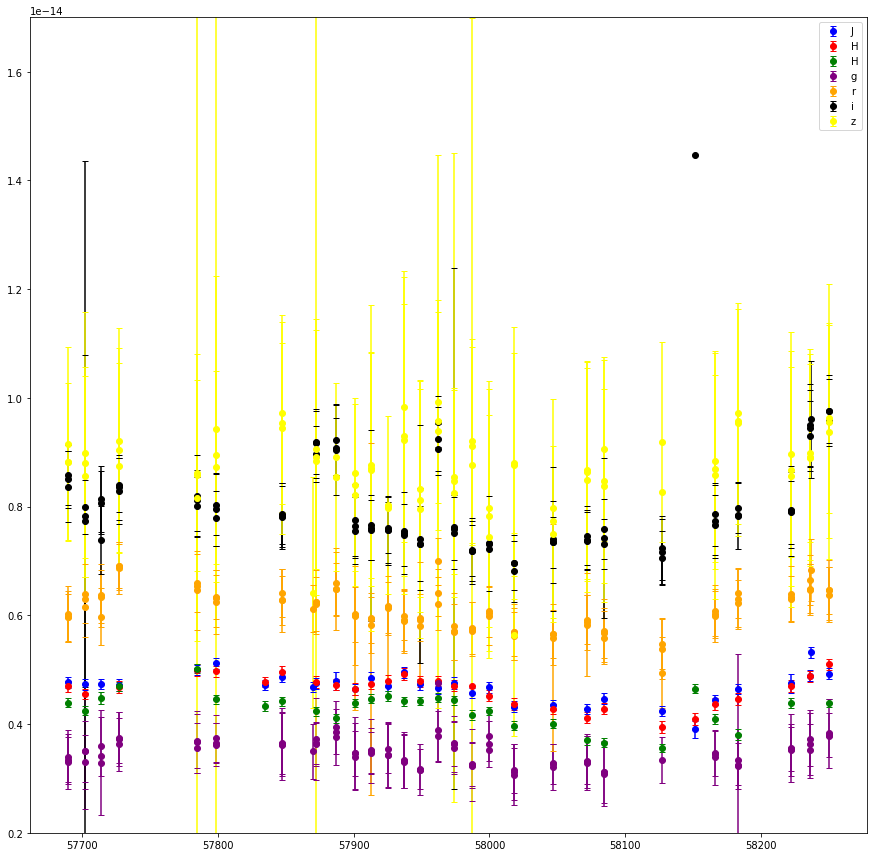

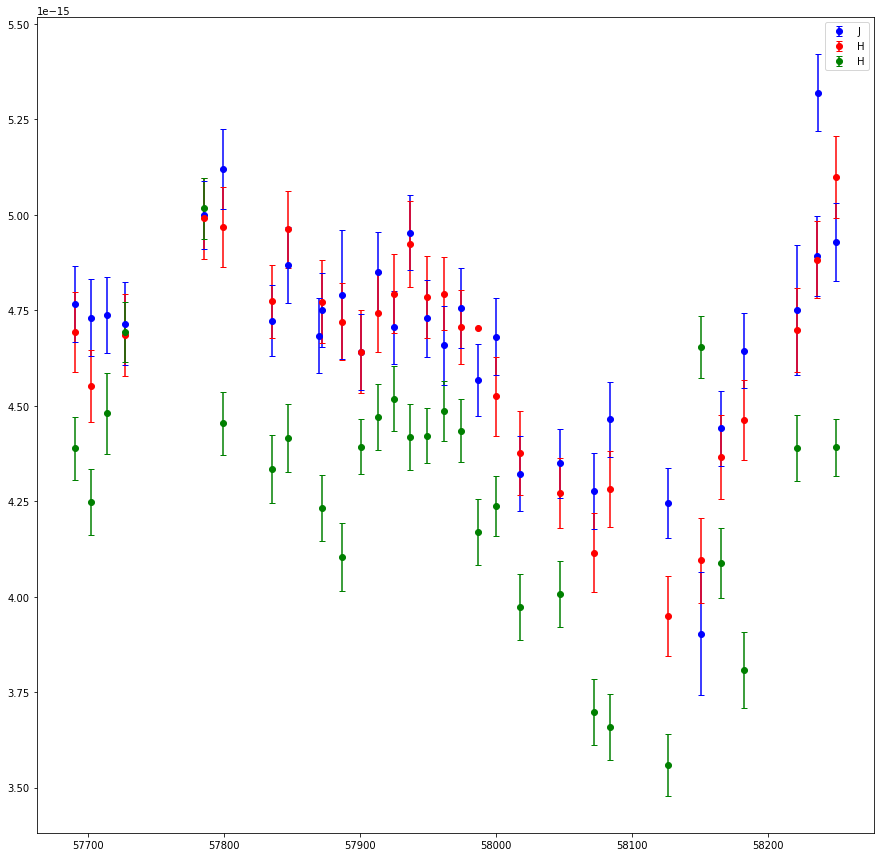

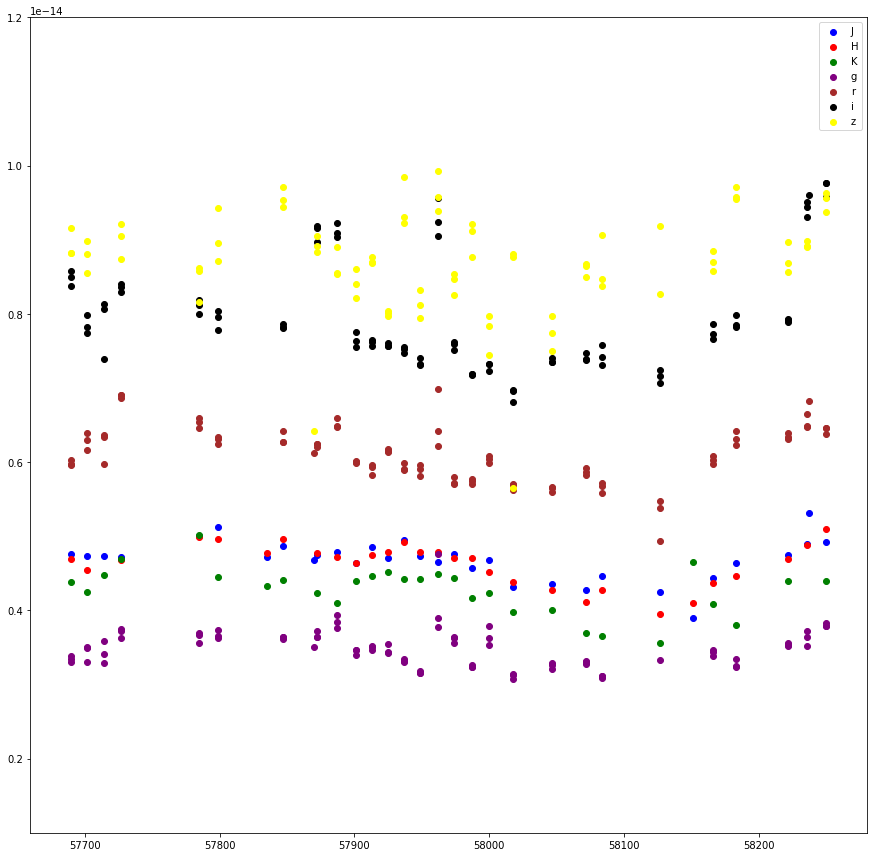

In [66]:
plt.figure(figsize=(15,15))
plt.errorbar(data_J[:,0],data_J[:,1],yerr=error_J[:,1],fmt='o',capsize=3,color='b',label='J')
plt.errorbar(data_H[:,0],data_H[:,1],yerr=error_H[:,1],fmt='o',capsize=3,color='r',label='H')
plt.errorbar(data_K[:,0],data_K[:,1],yerr=error_K[:,1],fmt='o',capsize=3,color='g',label='H')
plt.errorbar(data_g[:,0],data_g[:,1],yerr=error_g[:,1],fmt='o',capsize=3,color='purple',label='g')
plt.errorbar(data_r[:,0],data_r[:,1],yerr=error_r[:,1],fmt='o',capsize=3,color='orange',label='r')
plt.errorbar(data_i[:,0],data_i[:,1],yerr=error_i[:,1],fmt='o',capsize=3,color='black',label='i')
plt.errorbar(data_z[:,0],data_z[:,1],yerr=error_z[:,1],fmt='o',capsize=3,color='yellow',label='z')
plt.ylim([2e-15,1.7e-14])
plt.legend()
plt.show()

plt.figure(figsize=(15,15))
plt.errorbar(data_J[:,0],data_J[:,1],yerr=error_J[:,1],fmt='o',capsize=3,color='b',label='J')
plt.errorbar(data_H[:,0],data_H[:,1],yerr=error_H[:,1],fmt='o',capsize=3,color='r',label='H')
plt.errorbar(data_K[:,0],data_K[:,1],yerr=error_K[:,1],fmt='o',capsize=3,color='g',label='H')
#plt.errorbar(data_z[:,0],data_z[:,1],yerr=error_z[:,1],fmt='o',capsize=3,color='yellow',label='z')'
plt.legend()
plt.show()

plt.figure(figsize=(15,15))
plt.scatter(data_J[:,0],data_J[:,1],color='b',label='J')
plt.scatter(data_H[:,0],data_H[:,1],color='r',label='H')
plt.scatter(data_K[:,0],data_K[:,1],color='g',label='K')
plt.scatter(data_g[:,0],data_g[:,1],color='purple',label='g')
plt.scatter(data_r[:,0],data_r[:,1],color='brown',label='r')
plt.scatter(data_i[:,0],data_i[:,1],color='black',label='i')
plt.scatter(data_z[:,0],data_z[:,1],color='yellow',label='z')
plt.ylim([1e-15,1.2e-14])
plt.legend()
plt.show()

In [55]:
data_K = np.loadtxt('NOVEMBER/NOV-NGC3783-K') #'NOVEMBER/Kelly-NGC3783K')
error_K = np.loadtxt('NOVEMBER/NGC3783_NOISE_K.txt') #Load data

data_H = np.loadtxt('NOVEMBER/NOV-NGC3783-H') #'NOVEMBER/Kelly-NGC3783K')
error_H = np.loadtxt('NOVEMBER/NGC3783_NOISE_H.txt') #Load data

data_J = np.loadtxt('NOVEMBER/NOV-NGC3783-J') #'NOVEMBER/Kelly-NGC3783K')
error_J = np.loadtxt('NOVEMBER/NGC3783_NOISE_J.txt') #Load data

data_g = np.loadtxt('NOVEMBER/NOV-NGC3783-g') #'NOVEMBER/Kelly-NGC3783K')
error_g = np.loadtxt('NOVEMBER/NGC3783_NOISE_g.txt') #Load data

data_r = np.loadtxt('NOVEMBER/NOV-NGC3783-r') #'NOVEMBER/Kelly-NGC3783K')
error_r = np.loadtxt('NOVEMBER/NGC3783_NOISE_r.txt') #Load data

data_i = np.loadtxt('NOVEMBER/NOV-NGC3783-i') #'NOVEMBER/Kelly-NGC3783K')
error_i = np.loadtxt('NOVEMBER/NGC3783_NOISE_i.txt') #Load data

data_z = np.loadtxt('NOVEMBER/NOV-NGC3783-z') #'NOVEMBER/Kelly-NGC3783K')
error_z = np.loadtxt('NOVEMBER/NGC3783_NOISE_z.txt') #Load data

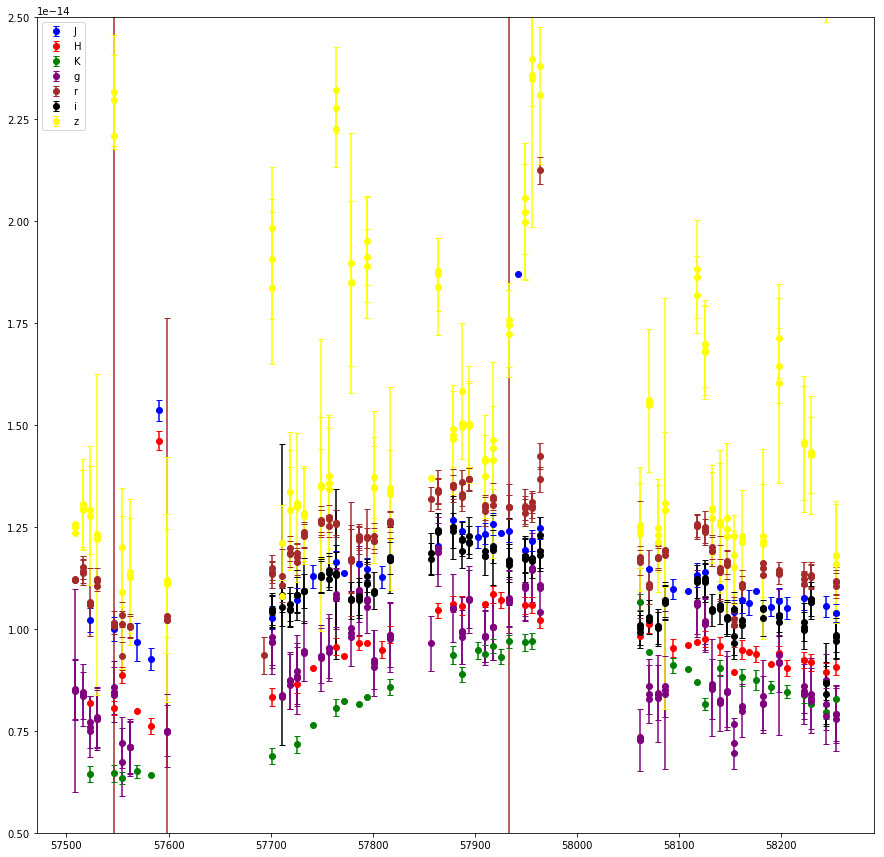

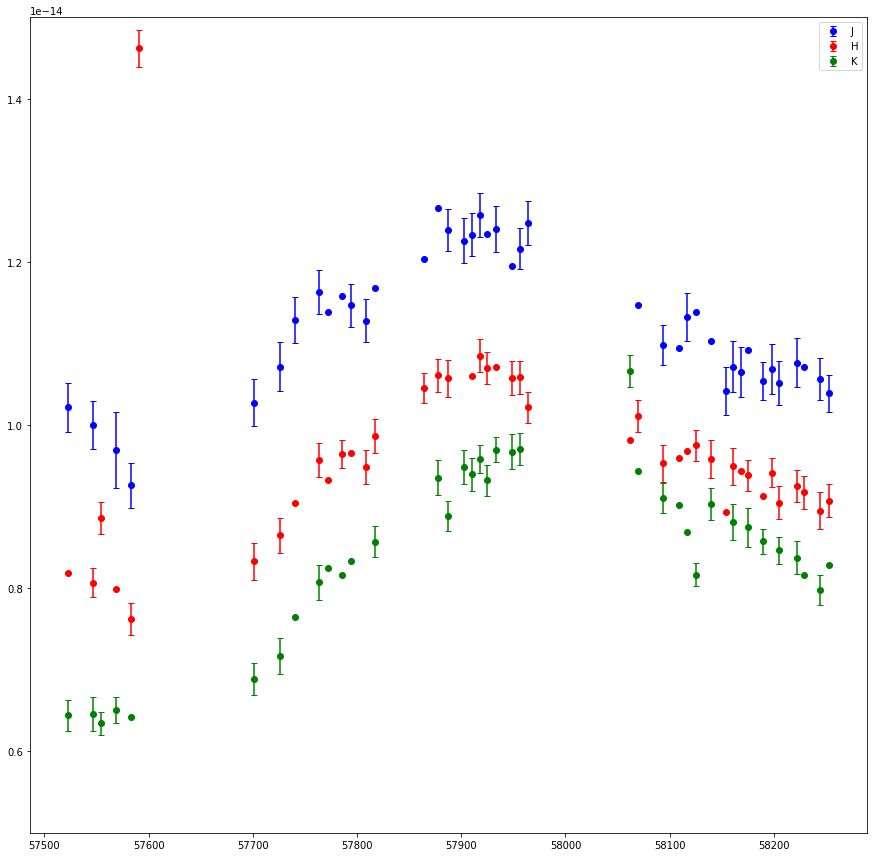

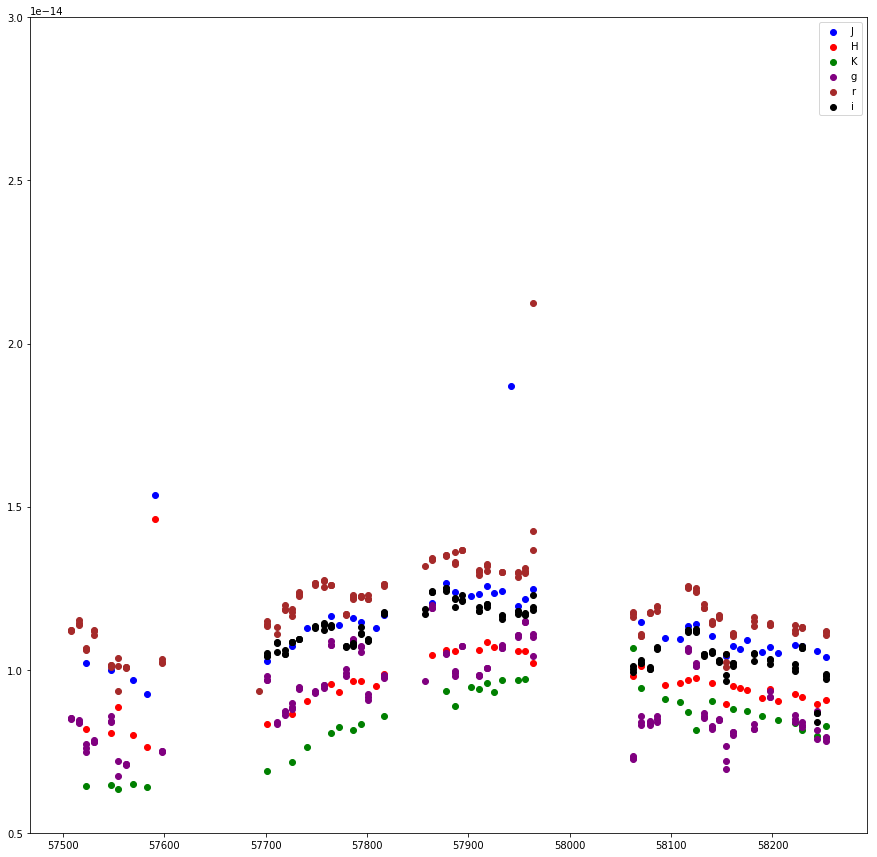

In [59]:
plt.figure(figsize=(15,15))
plt.errorbar(data_J[:,0],data_J[:,2],yerr=error_J[:,2],fmt='o',capsize=3,color='b',label='J')
plt.errorbar(data_H[:,0],data_H[:,2],yerr=error_H[:,2],fmt='o',capsize=3,color='r',label='H')
plt.errorbar(data_K[:,0],data_K[:,2],yerr=error_K[:,2],fmt='o',capsize=3,color='g',label='K')
plt.errorbar(data_g[:,0],data_g[:,2],yerr=error_g[:,2],fmt='o',capsize=3,color='purple',label='g')
plt.errorbar(data_r[:,0],data_r[:,2],yerr=error_r[:,2],fmt='o',capsize=3,color='brown',label='r')
plt.errorbar(data_i[:,0],data_i[:,2],yerr=error_i[:,2],fmt='o',capsize=3,color='black',label='i')
plt.errorbar(data_z[:,0],data_z[:,2],yerr=error_z[:,2],fmt='o',capsize=3,color='yellow',label='z')
plt.ylim([5e-15,2.5e-14])
plt.legend()
plt.show()

plt.figure(figsize=(15,15))
plt.errorbar(data_J[:,0],data_J[:,2],yerr=error_J[:,2],fmt='o',capsize=3,color='b',label='J')
plt.errorbar(data_H[:,0],data_H[:,2],yerr=error_H[:,2],fmt='o',capsize=3,color='r',label='H')
plt.errorbar(data_K[:,0],data_K[:,2],yerr=error_K[:,2],fmt='o',capsize=3,color='g',label='K')
plt.ylim([5e-15,1.5e-14])
plt.legend()
plt.show()

plt.figure(figsize=(15,15))
plt.scatter(data_J[:,0],data_J[:,2],color='b',label='J')
plt.scatter(data_H[:,0],data_H[:,2],color='r',label='H')
plt.scatter(data_K[:,0],data_K[:,2],color='g',label='K')
plt.scatter(data_g[:,0],data_g[:,2],color='purple',label='g')
plt.scatter(data_r[:,0],data_r[:,2],color='brown',label='r')
plt.scatter(data_i[:,0],data_i[:,2],color='black',label='i')
#plt.scatter(data_z[:,0],data_z[:,2],color='yellow',label='z')
plt.ylim([5e-15,3e-14])
plt.legend()
plt.show()